In [1]:
#必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv('train.csv')   #データの読み込み

train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)   #Cabinを３つの特徴量に分割
dummies = pd.get_dummies(train_data['Deck'], prefix='Deck_Type')    #Deckのダミー変数を作成・追加
train_data = pd.concat([train_data,dummies], axis=1)

train_data['Side'] = train_data['Side'].map({'P': 0, 'S': 1})   #Sideは０と１に変換
train_data['CryoSleep'] = train_data['CryoSleep'].astype(bool)  #CryoSleepとVIPはbooleanに変換
train_data['VIP'] = train_data['VIP'].astype(bool)


train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Num,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,Deck_Type_T
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,0.0,False,True,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,1.0,False,False,False,False,False,True,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,1.0,True,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,1.0,True,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,1.0,False,False,False,False,False,True,False,False


In [54]:
num_dummies = pd.get_dummies(train_data['Num'], prefix='Num')
train_data = pd.concat([train_data, num_dummies], axis=1)


In [64]:
y_train_val = train_data['Transported']
x_train_val= train_data.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name', 'Transported','Deck', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck','Deck_Type_T', 'Num'], axis=1)
x_train_val.head()

,CryoSleep,Age,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,...,Num_990,Num_991,Num_992,Num_993,Num_994,Num_995,Num_996,Num_997,Num_998,Num_999
0,0,39.0,0.0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,24.0,1.0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,0,58.0,1.0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,33.0,1.0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,16.0,1.0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.3, random_state=1)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtree = DecisionTreeClassifier(max_depth=2, min_samples_split=30,random_state=0)

In [84]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=30, random_state=0)

In [85]:
print(f'train score: {dtree.score(x_train, y_train)}')
print(f'train score: {dtree.score(x_val, y_val)}')

train score: 0.7342645850451931
train score: 0.7358128834355828


In [69]:
Columns = x_train_val.columns
Columns

Index(['CryoSleep', 'Age', 'Side', 'Deck_Type_A', 'Deck_Type_B', 'Deck_Type_C',
       'Deck_Type_D', 'Deck_Type_E', 'Deck_Type_F', 'Deck_Type_G',
       ...
       'Num_990', 'Num_991', 'Num_992', 'Num_993', 'Num_994', 'Num_995',
       'Num_996', 'Num_997', 'Num_998', 'Num_999'],
      dtype='object', length=1827)

In [70]:
feature_importance = dtree.feature_importances_
feature_importance

array([0.20339233, 0.09999579, 0.01393096, ..., 0.        , 0.        ,
       0.00075359], shape=(1827,))

<BarContainer object of 1827 artists>

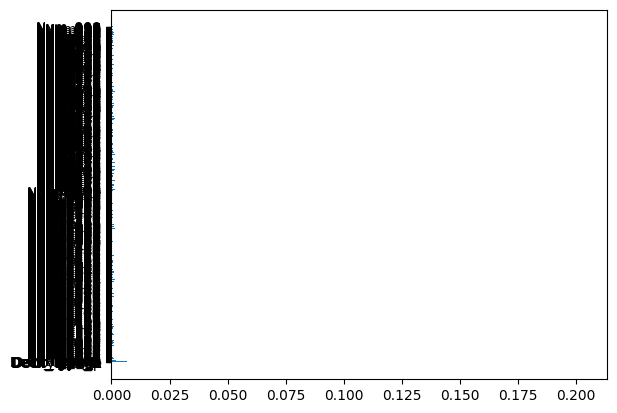

In [71]:
y = Columns
width = feature_importance
plt.barh(y=y, width=width)

In [36]:
from sklearn.model_selection import GridSearchCV

In [73]:
estimator = DecisionTreeClassifier(random_state = 0)
param_grid = [{
    'max_depth': [3, 20, 50],
    'min_samples_split': [3, 20, 30]
}]
cv = 5

In [74]:
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv,
                           return_train_score=False)

In [75]:
tuned_model.fit(x_train_val, y_train_val)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': [3, 20, 50],
                          'min_samples_split': [3, 20, 30]}])

In [76]:
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.144963,0.129942,0.128434,0.334375,0.332454,0.334252,0.582247,0.610702,0.611273
std_fit_time,0.012138,0.006105,0.004017,0.014995,0.011249,0.016075,0.04194,0.034097,0.05033
mean_score_time,0.007649,0.006977,0.007024,0.006994,0.006734,0.006853,0.006981,0.007143,0.007433
std_score_time,0.001056,0.000101,0.000227,0.000345,0.000182,0.000092,0.00023,0.000187,0.000154
param_max_depth,3,3,3,20,20,20,50,50,50
param_min_samples_split,3,20,30,3,20,30,3,20,30
params,"{'max_depth': 3, 'min_samples_split': 3}","{'max_depth': 3, 'min_samples_split': 20}","{'max_depth': 3, 'min_samples_split': 30}","{'max_depth': 20, 'min_samples_split': 3}","{'max_depth': 20, 'min_samples_split': 20}","{'max_depth': 20, 'min_samples_split': 30}","{'max_depth': 50, 'min_samples_split': 3}","{'max_depth': 50, 'min_samples_split': 20}","{'max_depth': 50, 'min_samples_split': 30}"
split0_test_score,0.722829,0.722829,0.722829,0.704428,0.703278,0.710753,0.687752,0.699252,0.695802
split1_test_score,0.73318,0.73318,0.73318,0.719379,0.730305,0.73203,0.719379,0.713629,0.718804
split2_test_score,0.721104,0.721104,0.721104,0.723404,0.72743,0.72743,0.716504,0.719379,0.719954


In [77]:
param_grid = [{
    'max_depth': [2, 5, 10],
    'min_samples_split': [20, 30, 40]
}]

In [78]:
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv,
                           return_train_score=False)

In [79]:
tuned_model.fit(x_train_val, y_train_val)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': [2, 5, 10],
                          'min_samples_split': [20, 30, 40]}])

In [80]:
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.112735,0.113262,0.108224,0.162511,0.163821,0.161533,0.234806,0.228566,0.240399
std_fit_time,0.007282,0.006767,0.001584,0.007617,0.005793,0.006924,0.013865,0.007854,0.012374
mean_score_time,0.008245,0.007105,0.006933,0.006927,0.006665,0.006664,0.006795,0.006939,0.007121
std_score_time,0.001724,0.000265,0.000282,0.000211,0.000138,0.000254,0.000365,0.000396,0.000284
param_max_depth,2,2,2,5,5,5,10,10,10
param_min_samples_split,20,30,40,20,30,40,20,30,40
params,"{'max_depth': 2, 'min_samples_split': 20}","{'max_depth': 2, 'min_samples_split': 30}","{'max_depth': 2, 'min_samples_split': 40}","{'max_depth': 5, 'min_samples_split': 20}","{'max_depth': 5, 'min_samples_split': 30}","{'max_depth': 5, 'min_samples_split': 40}","{'max_depth': 10, 'min_samples_split': 20}","{'max_depth': 10, 'min_samples_split': 30}","{'max_depth': 10, 'min_samples_split': 40}"
split0_test_score,0.722829,0.722829,0.722829,0.729155,0.729155,0.729155,0.72858,0.72858,0.725129
split1_test_score,0.73318,0.73318,0.73318,0.743531,0.743531,0.743531,0.73778,0.73778,0.73778
split2_test_score,0.721104,0.721104,0.721104,0.730305,0.730305,0.730305,0.728005,0.728005,0.728005


In [81]:
param_grid = [{
    'max_depth': [1, 2, 3],
    'min_samples_split': [30, 40, 50]
}]

In [82]:
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv,
                           return_train_score=False)
tuned_model.fit(x_train_val, y_train_val)
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.092581,0.086235,0.085744,0.105264,0.104183,0.107622,0.130786,0.130204,0.131166
std_fit_time,0.01463,0.001189,0.000605,0.003424,0.002585,0.001899,0.004818,0.002488,0.004216
mean_score_time,0.006942,0.007176,0.006991,0.006525,0.006601,0.006952,0.00713,0.006995,0.007238
std_score_time,0.000293,0.000339,0.000107,0.000279,0.000209,0.000156,0.000283,0.000418,0.000136
param_max_depth,1,1,1,2,2,2,3,3,3
param_min_samples_split,30,40,50,30,40,50,30,40,50
params,"{'max_depth': 1, 'min_samples_split': 30}","{'max_depth': 1, 'min_samples_split': 40}","{'max_depth': 1, 'min_samples_split': 50}","{'max_depth': 2, 'min_samples_split': 30}","{'max_depth': 2, 'min_samples_split': 40}","{'max_depth': 2, 'min_samples_split': 50}","{'max_depth': 3, 'min_samples_split': 30}","{'max_depth': 3, 'min_samples_split': 40}","{'max_depth': 3, 'min_samples_split': 50}"
split0_test_score,0.706153,0.706153,0.706153,0.722829,0.722829,0.722829,0.722829,0.722829,0.722829
split1_test_score,0.716504,0.716504,0.716504,0.73318,0.73318,0.73318,0.73318,0.73318,0.73318
split2_test_score,0.712478,0.712478,0.712478,0.721104,0.721104,0.721104,0.721104,0.721104,0.721104


In [114]:
test_data = pd.read_csv('test.csv')

In [115]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [116]:
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True) #Cabinを分割してそれぞれ数字で表す
dummies = pd.get_dummies(test_data['Deck'], prefix='Deck_Type')
dummies = dummies.astype(int)
test_data = pd.concat([test_data,dummies], axis=1)
test_data['Side'] = test_data['Side'].map({'P': 0, 'S': 1})
test_data['CryoSleep'] = test_data['CryoSleep'].astype(bool).astype(int)
test_data['VIP'] = test_data['VIP'].astype(bool).astype(int)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Num,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,Deck_Type_T
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,...,3,1.0,0,0,0,0,0,0,1,0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,...,4,1.0,0,0,0,0,0,1,0,0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,...,0,1.0,0,0,1,0,0,0,0,0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,...,1,1.0,0,0,1,0,0,0,0,0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,...,5,1.0,0,0,0,0,0,1,0,0


In [117]:
num_dummies = pd.get_dummies(test_data['Num'], prefix='Num')
test_data = pd.concat([test_data, num_dummies], axis=1)

In [118]:
x_test= test_data.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name', 'Deck', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck','Deck_Type_T', 'Num'], axis=1)
x_test.head()

,CryoSleep,Age,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,...,Num_988,Num_989,Num_99,Num_990,Num_992,Num_993,Num_994,Num_995,Num_996,Num_997
0,1,27.0,1.0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,0,19.0,1.0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1,31.0,1.0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,38.0,1.0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,20.0,1.0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [119]:
x_train.head()

,CryoSleep,Age,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,...,Num_990,Num_991,Num_992,Num_993,Num_994,Num_995,Num_996,Num_997,Num_998,Num_999
3230,0,33.0,1.0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1907,1,24.0,1.0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1528,1,35.0,0.0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3509,0,28.0,0.0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2776,1,26.0,0.0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [121]:
for col in x_train.columns:
    if col not in x_test.columns:
        x_test[col] = 0 

# x_testのカラムをx_trainと同じ順番に並べる
x_test = x_test[x_train.columns]

In [123]:
predictions = dtree.predict(x_test)

In [125]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': predictions
})
submission.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


In [126]:
submission['Transported'] = submission['Transported'].astype(bool)

In [127]:
submission.to_csv('submission.csv', index=False)
